In [2]:
%run ../../data/api_keys.ipynb
%run ../modulos.ipynb
plt.style.use('default') 

In [3]:
def request_github(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res.json()

## Información Histórica

In [4]:
def lista_fecha_a_df(lista,nombre, plot=False):
  df=pd.DataFrame({nombre:lista})
  df[f'freq_{nombre}']=pd.to_datetime(df[nombre]).dt.date
  df1=df.groupby(f'freq_{nombre}').size().cumsum()
  if plot: df1.plot()
  return df1

### Estrellas

In [5]:
res_repo=request_github('https://api.github.com/repos/freeCodeCamp/freeCodeCamp')
num_total_estrellas=res_repo['stargazers_count']

In [6]:
def request_github_no_json(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res

In [10]:
def create_stargazers_count(user,repo):
    """this function creates the stargazers count dataframe"""

    star_count_url = "https://api.github.com/repos/"+user+"/"+repo
    # response = requests.request("GET", star_count_url)
    response = request_github_no_json(star_count_url)
    total_star_count = response.json()['stargazers_count']
    loops = int(total_star_count / 100) + 1
    star_trends_url = "https://api.github.com/repos/"+user+"/"+repo+"/stargazers"
    star_trends_resp = []
    headers = {
    "Accept": "application/vnd.github.v3.star+json",
    "content-type": "application/json"
    }
    for page in range(loops):
        # response = requests.request("GET", star_trends_url+"?per_page=100"+"&page="+str(page+1), headers=headers).json()
        response = request_github_no_json(star_trends_url+"?per_page=100"+"&page="+str(page+1)).json()
        star_trends_resp.extend(response)

    df = json_normalize(star_trends_resp)

    #df['starred_date'] = pd.to_datetime(df['starred_at']).dt.date

    #star_trend_df = df.groupby(['starred_date'])['starred_date'].count().cumsum().reset_index(name="count")

    return df

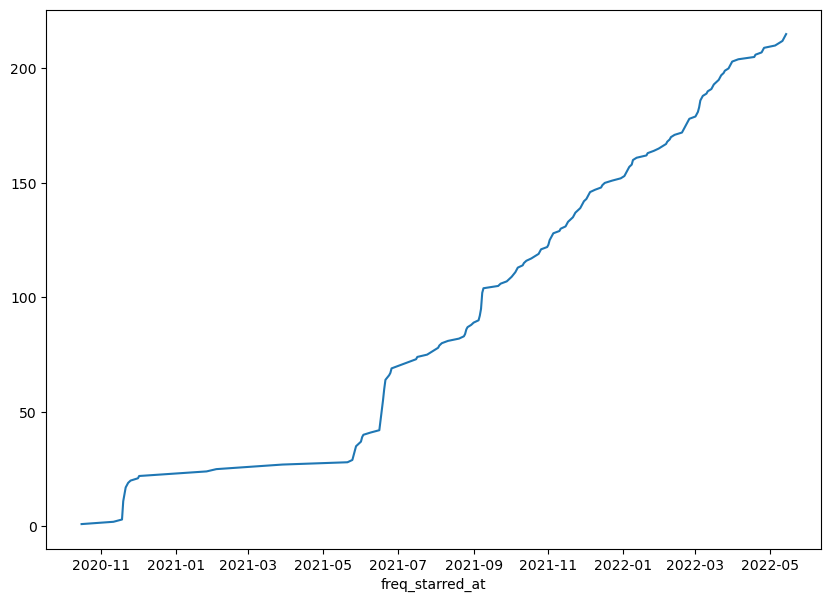

In [20]:
df_stars=create_stargazers_count('pysentimiento','pysentimiento')
plt.figure(figsize=(10,7))
starred_acum_df= lista_fecha_a_df(df_stars['starred_at'], 'starred_at', True)

### Repos

In [320]:
def create_repos_count(user):
    """this function creates the stargazers count dataframe"""

    repos_url = "https://api.github.com/users/"+user+"/repos"
    repos_resp = []
   
    page=0
    response = request_github_no_json(repos_url+"?per_page=100"+"&page="+str(page+1)).json() # primeras 100
    repos_resp.extend(response)
    while len(response)!=0:
        page+=1
        response = request_github_no_json(repos_url+"?per_page=100"+"&page="+str(page+1)).json()
        repos_resp.extend(response)
        
    df = json_normalize(repos_resp)

    return df


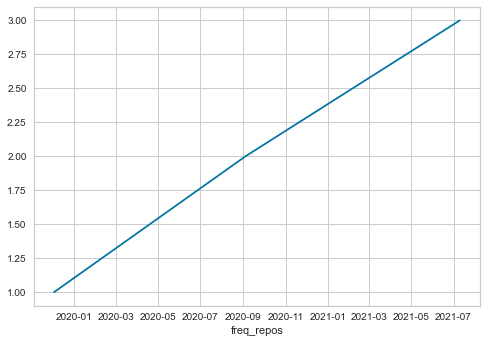

In [329]:
df1=lista_fecha_a_df(df.created_at,'repos')

### Starred

In [ ]:
https://api.github.com/search/repositories?q=stars%3A1..1000&s=forks?per_page=100&page=page1

In [36]:
def create_starred_count(user):
    """this function creates the stargazers count dataframe"""

    starred_url = "https://api.github.com/users/"+user+"/starred"
    repos_resp = []
   
    page=0
    response = request_github_no_json(starred_url+"?per_page=100"+"&page="+str(page+1)).json() # primeras 100
    repos_resp.extend(response)
    while len(response)!=0:
        page+=1
        response = request_github_no_json(starred_url+"?per_page=100"+"&page="+str(page+1)).json()
        repos_resp.extend(response)
        

    df = json_normalize(repos_resp)

    return df

In [41]:
starred_df = create_starred_count('gandres-dev')
starred_df.head()

,starred_at,repo.id,repo.node_id,repo.name,repo.full_name,repo.private,repo.owner.login,repo.owner.id,repo.owner.node_id,repo.owner.avatar_url,...,repo.forks,repo.open_issues,repo.watchers,repo.default_branch,repo.permissions.admin,repo.permissions.maintain,repo.permissions.push,repo.permissions.triage,repo.permissions.pull,repo.license
0,2022-05-21T03:19:02Z,56186352,MDEwOlJlcG9zaXRvcnk1NjE4NjM1Mg==,TweetSploit,davidsilveiro/TweetSploit,False,davidsilveiro,17771839,MDQ6VXNlcjE3NzcxODM5,https://avatars.githubusercontent.com/u/177718...,...,5,0,21,master,False,False,False,False,True,NaN
1,2022-05-21T02:32:32Z,231283452,MDEwOlJlcG9zaXRvcnkyMzEyODM0NTI=,excalidraw,excalidraw/excalidraw,False,excalidraw,59452120,MDEyOk9yZ2FuaXphdGlvbjU5NDUyMTIw,https://avatars.githubusercontent.com/u/594521...,...,2373,657,29478,master,False,False,False,False,True,NaN
2,2022-05-15T23:20:42Z,465596625,R_kgDOG8Bw0Q,ShortLinks,gandres-dev/ShortLinks,False,gandres-dev,84817124,MDQ6VXNlcjg0ODE3MTI0,https://avatars.githubusercontent.com/u/848171...,...,3,0,2,main,False,False,False,False,True,NaN
3,2022-05-11T14:47:40Z,292896321,MDEwOlJlcG9zaXRvcnkyOTI4OTYzMjE=,pysentimiento,pysentimiento/pysentimiento,False,pysentimiento,85897277,MDEyOk9yZ2FuaXphdGlvbjg1ODk3Mjc3,https://avatars.githubusercontent.com/u/858972...,...,24,4,215,master,False,False,False,False,True,NaN
4,2022-05-06T19:20:33Z,480470915,R_kgDOHKNngw,CursoPLN2-UNAM,juanmvsa/CursoPLN2-UNAM,False,juanmvsa,37162022,MDQ6VXNlcjM3MTYyMDIy,https://avatars.githubusercontent.com/u/371620...,...,2,1,5,main,False,False,False,False,True,NaN


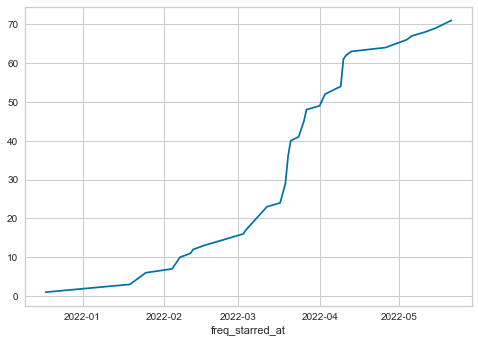

In [50]:
df_acum_starred = lista_fecha_a_df(starred_df['starred_at'], 'starred_at', True)

### forks

Están en páginas de 30

In [54]:
# lista_forks=request_github('https://api.github.com/repos/freeCodeCamp/freeCodeCamp/forks')

def create_forks_count(user, repo):
    """this function creates the stargazers count dataframe"""

    forks_url = f"https://api.github.com/repos/{user}/{repo}/forks"
    repos_resp = []
   
    page=0
    response = request_github_no_json(forks_url+"?per_page=100"+"&page="+str(page+1)).json() # primeras 100
    repos_resp.extend(response)
    while len(response)!=0:
        page+=1
        response = request_github_no_json(forks_url+"?per_page=100"+"&page="+str(page+1)).json()
        repos_resp.extend(response)
        
    df = json_normalize(repos_resp)

    return df

In [56]:
forks_df = create_forks_count('blancavazquez', 'CursoDatosMasivosI')
forks_df.head()

,id,node_id,name,full_name,private,html_url,description,fork,url,forks_url,...,owner.repos_url,owner.events_url,owner.received_events_url,owner.type,owner.site_admin,permissions.admin,permissions.maintain,permissions.push,permissions.triage,permissions.pull
0,490485300,R_kgDOHTw2NA,CursoDatosMasivosI,OctavioHatadi/CursoDatosMasivosI,False,https://github.com/OctavioHatadi/CursoDatosMas...,"Diapositivas, ejercicios, código de ejemplo y ...",True,https://api.github.com/repos/OctavioHatadi/Cur...,https://api.github.com/repos/OctavioHatadi/Cur...,...,https://api.github.com/users/OctavioHatadi/repos,https://api.github.com/users/OctavioHatadi/eve...,https://api.github.com/users/OctavioHatadi/rec...,User,False,False,False,False,False,True
1,483316780,R_kgDOHM7ULA,CursoDatosMasivosI,MarcelaCruz/CursoDatosMasivosI,False,https://github.com/MarcelaCruz/CursoDatosMasivosI,"Diapositivas, ejercicios, código de ejemplo y ...",True,https://api.github.com/repos/MarcelaCruz/Curso...,https://api.github.com/repos/MarcelaCruz/Curso...,...,https://api.github.com/users/MarcelaCruz/repos,https://api.github.com/users/MarcelaCruz/event...,https://api.github.com/users/MarcelaCruz/recei...,User,False,False,False,False,False,True
2,463916767,R_kgDOG6bO3w,CursoDatosMasivosI,dafelisioso/CursoDatosMasivosI,False,https://github.com/dafelisioso/CursoDatosMasivosI,"Diapositivas, ejercicios, código de ejemplo y ...",True,https://api.github.com/repos/dafelisioso/Curso...,https://api.github.com/repos/dafelisioso/Curso...,...,https://api.github.com/users/dafelisioso/repos,https://api.github.com/users/dafelisioso/event...,https://api.github.com/users/dafelisioso/recei...,User,False,False,False,False,False,True
3,463736415,R_kgDOG6QOXw,CursoDatosMasivosI,CamSV/CursoDatosMasivosI,False,https://github.com/CamSV/CursoDatosMasivosI,"Diapositivas, ejercicios, código de ejemplo y ...",True,https://api.github.com/repos/CamSV/CursoDatosM...,https://api.github.com/repos/CamSV/CursoDatosM...,...,https://api.github.com/users/CamSV/repos,https://api.github.com/users/CamSV/events{/pri...,https://api.github.com/users/CamSV/received_ev...,User,False,False,False,False,False,True
4,454918978,R_kgDOGx2DQg,CursoDatosMasivosI,Iroyoshi/CursoDatosMasivosI,False,https://github.com/Iroyoshi/CursoDatosMasivosI,"Diapositivas, ejercicios, código de ejemplo y ...",True,https://api.github.com/repos/Iroyoshi/CursoDat...,https://api.github.com/repos/Iroyoshi/CursoDat...,...,https://api.github.com/users/Iroyoshi/repos,https://api.github.com/users/Iroyoshi/events{/...,https://api.github.com/users/Iroyoshi/received...,User,False,False,False,False,False,True


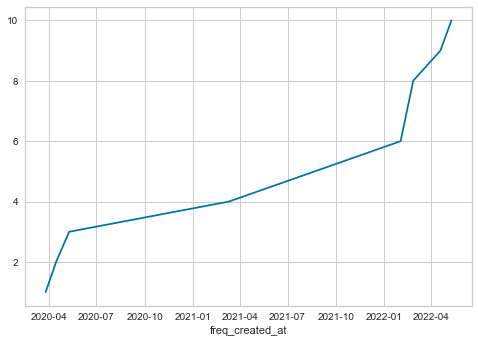

In [57]:
df_cum_fork = lista_fecha_a_df(forks_df['created_at'], 'created_at', True)

# Commits

In [75]:
def create_commits_count(user, repo):
    """this function creates the stargazers count dataframe"""

    commits_url = f"https://api.github.com/repos/{user}/{repo}/commits"
    repos_resp = []
   
    page=0
    response = request_github_no_json(commits_url+"?per_page=100"+"&page="+str(page+1)).json() # primeras 100
    repos_resp.extend([i['commit']['author']['date'] for i in response])
    while len(response)!=0:
        page+=1
        response = request_github_no_json(commits_url+"?per_page=100"+"&page="+str(page+1)).json()
        repos_resp.extend([i['commit']['author']['date'] for i in response])
        
    df = pd.Series(repos_resp)

    return df

In [76]:
commits_df = create_commits_count('blancavazquez', 'CursoDatosMasivosI')
commits_df

0      2022-05-03T21:55:52Z
1      2022-05-03T13:08:40Z
2      2022-04-27T17:06:13Z
3      2022-04-26T14:29:35Z
4      2022-04-20T17:14:03Z
               ...         
162    2019-12-05T22:46:47Z
163    2019-12-05T22:44:57Z
164    2019-12-05T22:44:14Z
165    2019-12-05T22:43:23Z
166    2019-12-05T22:40:19Z
Length: 167, dtype: object

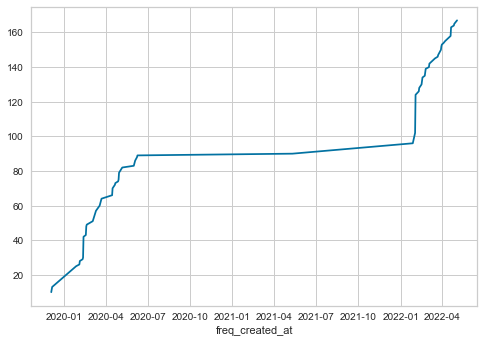

In [79]:
cummit_cum = lista_fecha_a_df(commits_df, 'created_at', True)

Otra idea sería agarrar usuarios pesados y ver qué repositorios "desconocidos" siguen (starred). Agregar a columnas de scrappeo

Primera fase ("no supervisado")
Etiquetar en 3: exitoso, medio exitoso, no exitoso

Segunda fase (supervisado)
Ir con los medio y no exitosos y ver si alguien pesado los sigue
